# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [2003]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
os.getcwd()
os.chdir('/Users/saarthaksrivastava/Downloads/trip_records')
df1 = pd.read_parquet('2023-1.parquet')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [34]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
#sampled_data = pd.concat([sampled_data, sample])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2005]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/saarthaksrivastava/Downloads/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()
# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df1 = pd.read_parquet(file_path)
        df1["date"]=df1["tpep_pickup_datetime"].dt.date
        df1["hour"]=df1["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df1['date'].unique():
            daily_date=df1[df1['date']==date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data=daily_date[daily_date['hour']==hour]

                # Sample 0.75% of the hourly data randomly
                sample = hour_data.sample(frac = 0.0075, random_state = 42)
                sampled_data = pd.concat([sampled_data, sample]) 
    
                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        

Error reading file new_df.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file df_tenp.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file latest_df.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file .ipynb_checkpoints: Error creating dataset. Could not read schema from '/Users/saarthaksrivastava/Downloads/trip_records/.ipynb_checkpoints/congest-checkpoint.csv'. Is this a 'parquet' file?: Could not open Parquet input source '/Users/saarthaksrivastava/Downloads/trip_records/.ipynb_checkpoints/congest-checkpoint.csv': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading 

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [2006]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   
3196663           144             0  ...      0.5        0.00           0.0   
3613               68             1  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   
3196663                    1.0         21.22                   NaN   
3613                       1.0         10.10                   2.5   

         Airport_fee        date  hour airport_fee  
1788             0.0  2023-12-01     0         NaN  
3196699          NaN  2023-12-01     0         NaN  
1408             0.0  2023-12-01     0         NaN  
3196663          NaN  2023-12-01     0         NaN  
3613             0.0  2023-12-01     0         NaN  

[5 rows x 22 columns]

In [2009]:
df.shape

(284492, 22)

In [2011]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv('new_df.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [2013]:
# Load the new data file
df = pd.read_csv('new_df.csv')

In [2015]:
# df.head()
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        1788         2  2023-12-01 00:27:51   2023-12-01 00:50:12   
1     3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55   
2        1408         2  2023-12-01 00:06:19   2023-12-01 00:16:57   
3     3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37   
4        3613         2  2023-12-01 00:16:07   2023-12-01 00:19:17   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           3.99         1.0                  N   
1              NaN           4.79         NaN                NaN   
2              1.0           1.05         1.0                  N   
3              NaN           2.08         NaN                NaN   
4              1.0           0.40         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           148            50  ...      0.5        5.66           0.0   
1           231            61  ...      0.5        3.00           0.0   
2           161           161  ...      0.5        3.14           0.0   
3           137           144  ...      0.5        0.00           0.0   
4            68            68  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

         date  hour  airport_fee  
0  2023-12-01     0          NaN  
1  2023-12-01     0          NaN  
2  2023-12-01     0          NaN  
3  2023-12-01     0          NaN  
4  2023-12-01     0          NaN  

[5 rows x 23 columns]

In [2017]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             284492 non-null  int64  
 1   VendorID               284492 non-null  int64  
 2   tpep_pickup_datetime   284492 non-null  object 
 3   tpep_dropoff_datetime  284492 non-null  object 
 4   passenger_count        275065 non-null  float64
 5   trip_distance          284492 non-null  float64
 6   RatecodeID             275065 non-null  float64
 7   store_and_fwd_flag     275065 non-null  object 
 8   PULocationID           284492 non-null  int64  
 9   DOLocationID           284492 non-null  int64  
 10  payment_type           284492 non-null  int64  
 11  fare_amount            284492 non-null  float64
 12  extra                  284492 non-null  float64
 13  mta_tax                284492 non-null  float64
 14  tip_amount             284492 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [2019]:
# Fix the index and drop any columns that are not needed
df = df.reset_index().drop(df.columns[0],axis=1)
df.head()
df = df.drop(columns = 'index',axis=1)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN                NaN           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN                NaN           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        5.66           0.0   
1             0  ...      0.5        3.00           0.0   
2             1  ...      0.5        3.14           0.0   
3             0  ...      0.5        0.00           0.0   
4             1  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

         date  hour airport_fee  
0  2023-12-01     0         NaN  
1  2023-12-01     0         NaN  
2  2023-12-01     0         NaN  
3  2023-12-01     0         NaN  
4  2023-12-01     0         NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [2021]:
# Combine the two airport fee columns
df['Airport_Fee'] = df['Airport_fee'].fillna(df['airport_fee'])
df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN                NaN           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN                NaN           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        5.66           0.0   
1             0  ...    0.0      0.5        3.00           0.0   
2             1  ...    1.0      0.5        3.14           0.0   
3             0  ...    0.0      0.5        0.00           0.0   
4             1  ...    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge        date hour  \
0                    1.0         33.96                   2.5  2023-12-01    0   
1                    1.0         29.43                   NaN  2023-12-01    0   
2                    1.0         18.84                   2.5  2023-12-01    0   
3                    1.0         21.22                   NaN  2023-12-01    0   
4                    1.0         10.10                   2.5  2023-12-01    0   

   Airport_Fee  
0          0.0  
1          NaN  
2          0.0  
3          NaN  
4          0.0  

[5 rows x 21 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [2023]:
# check where values of fare amount are negative
negative_values = (df['fare_amount'] < 0).any()
negative_values

False

Did you notice something different in the `RatecodeID` column for above records?

In [2025]:
# Analyse RatecodeID for the negative fare amounts
df[['RatecodeID', 'fare_amount']]
neg_values = (df[['fare_amount','RatecodeID']]<0).any()
neg_values

fare_amount    False
RatecodeID     False
dtype: bool

In [2027]:
# Find which columns have negative values
neg_values = df[df[['VendorID',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_Fee']]<0].any()
neg_values[neg_values==1]

extra                    True
mta_tax                  True
improvement_surcharge    True
total_amount             True
congestion_surcharge     True
Airport_Fee              True
dtype: bool

In [2035]:
# fix these negative values
## percentage of negative values contain by these columns
# ((df[df[['extra','mta_tax','improvement_surcharge','total_amount',
#     'congestion_surcharge','Airport_Fee']]<0].sum())/len(df))*100

## Removing the negative values from these columns
cols_to_fix = ['extra', 'mta_tax', 'improvement_surcharge', 
                'total_amount', 'congestion_surcharge', 'Airport_Fee']

for col in cols_to_fix:
    median_value = df[col].median()  # Compute median for each column
    df[col] = df[col].where(df[col] >= 0, median_value)

# Dataframe fixed with negative values-
nvalues = df[df[['VendorID',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_Fee']]<0].any()
nvalues


VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
date                     False
hour                     False
Airport_Fee              False
dtype: bool

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [2037]:
# Find the proportion of missing values in each column
proportion_missing = df.isna().mean()
proportion_missing

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033136
trip_distance            0.000000
RatecodeID               0.033136
store_and_fwd_flag       0.033136
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
date                     0.000000
hour                     0.000000
Airport_Fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [2039]:
# Display the rows with null values
df_null = df[df.isnull().any(axis=1)]
df_null
# missing NaN values percentage in 'passenger_count'
missing_values_prcnt = df['passenger_count'].isnull().sum()/len(df)*100
missing_values_prcnt.round(3)
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df.passenger_count.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
284487    False
284488    False
284489    False
284490    False
284491    False
Name: passenger_count, Length: 284492, dtype: bool

Did you find zeroes in passenger_count? Handle these.

In [2041]:
(df['passenger_count']==0).sum()

4375

In [2043]:
median_value = df.loc[df['passenger_count'] > 0, 'passenger_count'].median()
df['passenger_count'] = df['passenger_count'].replace(0, median_value)

In [2045]:
(df['passenger_count']==0).sum()

0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [2057]:
# Fix missing values in 'RatecodeID'
missing_values=(df.RatecodeID.isna().sum()/len(df))*100
df.RatecodeID.fillna(df.RatecodeID.mode().iloc[0],inplace=True)
df.RatecodeID.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
284487    False
284488    False
284489    False
284490    False
284491    False
Name: RatecodeID, Length: 284492, dtype: bool

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [2065]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].replace(0,np.nan)

In [2067]:
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)

In [2069]:
df['congestion_surcharge']

0         2.5
1         2.5
2         2.5
3         2.5
4         2.5
         ... 
284487    2.5
284488    2.5
284489    2.5
284490    2.5
284491    2.5
Name: congestion_surcharge, Length: 284492, dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [2071]:
# Handle any remaining missing values
df.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       9427
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
date                        0
hour                        0
Airport_Fee                 0
dtype: int64

In [2073]:
df.store_and_fwd_flag.isna().sum()
df.store_and_fwd_flag.fillna(df.store_and_fwd_flag.median,inplace=True)
df.store_and_fwd_flag.isna().sum()

0

In [2075]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_Fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [2077]:
# remove passenger_count > 6
df = df[df['passenger_count']<=6]
df['passenger_count']
(df['passenger_count']<=6).value_counts()
df['passenger_count']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
284487    1.0
284488    1.0
284489    1.0
284490    1.0
284491    1.0
Name: passenger_count, Length: 284487, dtype: float64

In [2079]:
# Continue with outlier handling
# Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
df = df[~((df['trip_distance']<0.1) & (df['fare_amount']>300))]
df[['trip_distance','fare_amount']]

trip_distance  fare_amount
0                3.99        23.30
1                4.79        22.43
2                1.05        10.70
3                2.08        17.22
4                0.40         5.10
...               ...          ...
284487           2.20        14.90
284488           6.50        41.50
284489           1.08        10.00
284490           3.20        17.00
284491          14.40        55.50

[284481 rows x 2 columns]

In [2081]:
# Entries where `trip_distance` is more than 250  miles.
df = df[~((df["trip_distance"] > 250))]
df['trip_distance']

0          3.99
1          4.79
2          1.05
3          2.08
4          0.40
          ...  
284487     2.20
284488     6.50
284489     1.08
284490     3.20
284491    14.40
Name: trip_distance, Length: 284478, dtype: float64

In [2083]:
# Entries where `trip_distance` and `fare_amount` are 0 
# but the pickup and dropoff zones are different 
# (both distance and fare should not be zero for different zones)

df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["tpep_pickup_datetime"] != df["tpep_dropoff_datetime"]))]
df[['trip_distance','fare_amount','tpep_pickup_datetime','tpep_dropoff_datetime']]

trip_distance  fare_amount tpep_pickup_datetime tpep_dropoff_datetime
0                3.99        23.30  2023-12-01 00:27:51   2023-12-01 00:50:12
1                4.79        22.43  2023-12-01 00:38:48   2023-12-01 01:01:55
2                1.05        10.70  2023-12-01 00:06:19   2023-12-01 00:16:57
3                2.08        17.22  2023-12-01 00:00:50   2023-12-01 00:14:37
4                0.40         5.10  2023-12-01 00:16:07   2023-12-01 00:19:17
...               ...          ...                  ...                   ...
284487           2.20        14.90  2023-06-30 23:32:05   2023-06-30 23:45:24
284488           6.50        41.50  2023-06-30 23:28:03   2023-07-01 00:10:39
284489           1.08        10.00  2023-06-30 23:15:04   2023-06-30 23:24:59
284490           3.20        17.00  2023-06-30 23:05:24   2023-06-30 23:23:37
284491          14.40        55.50  2023-06-30 23:37:38   2023-07-01 00:07:07

[284440 rows x 4 columns]

In [2085]:
# Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[~((df['payment_type']==0))]
df['payment_type']

0         1
2         1
4         1
5         1
6         1
         ..
284487    1
284488    1
284489    1
284490    2
284491    1
Name: payment_type, Length: 275017, dtype: int64

In [2087]:
# Do any columns need standardising?
## Columns are not required to standardized.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [2089]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_Fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical

The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

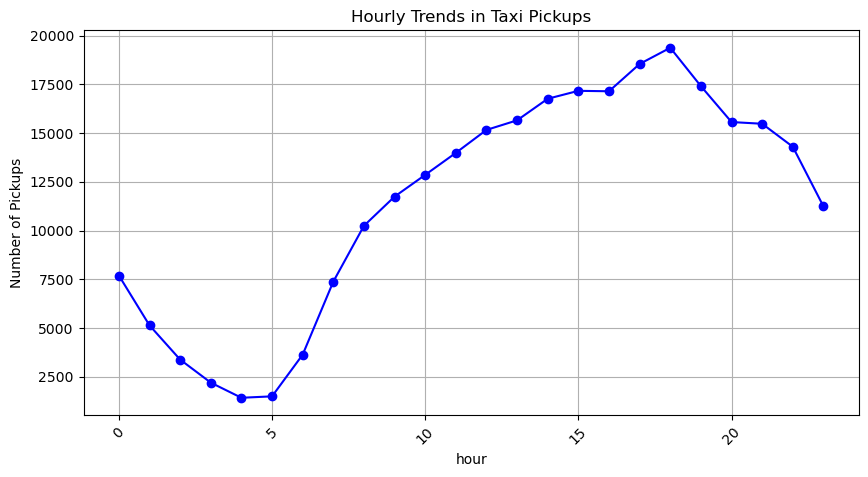

In [2091]:
# Find and show the hourly trends in taxi pickups
hourly_pickups = df.groupby('hour')['tpep_pickup_datetime'].count()
hourly_pickups.plot(kind='line', marker='o', figsize=(10, 5), color='blue', linestyle='-')
plt.xlabel('hour')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

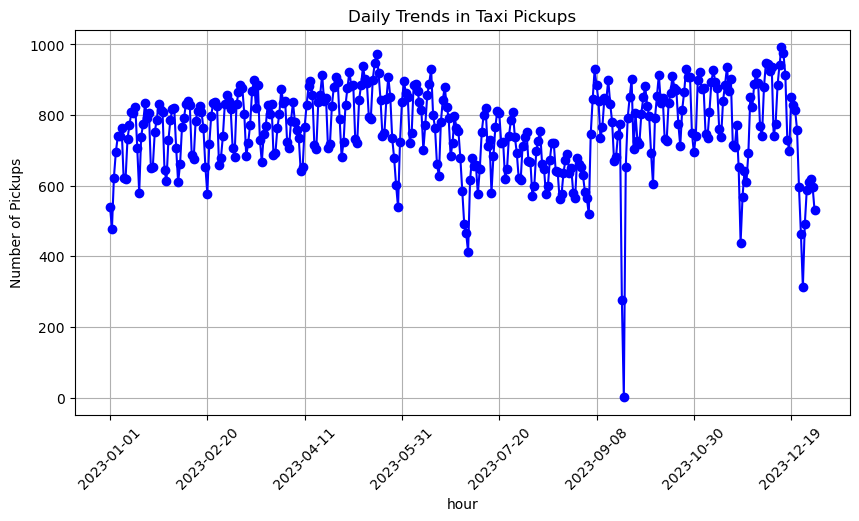

In [2093]:
# Find and show the daily trends in taxi pickups (days of the week)
daily_pickups = df.groupby('date')['tpep_pickup_datetime'].count()
daily_pickups.plot(kind='line', marker='o', figsize=(10, 5), color='blue', linestyle='-')
plt.xlabel('hour')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

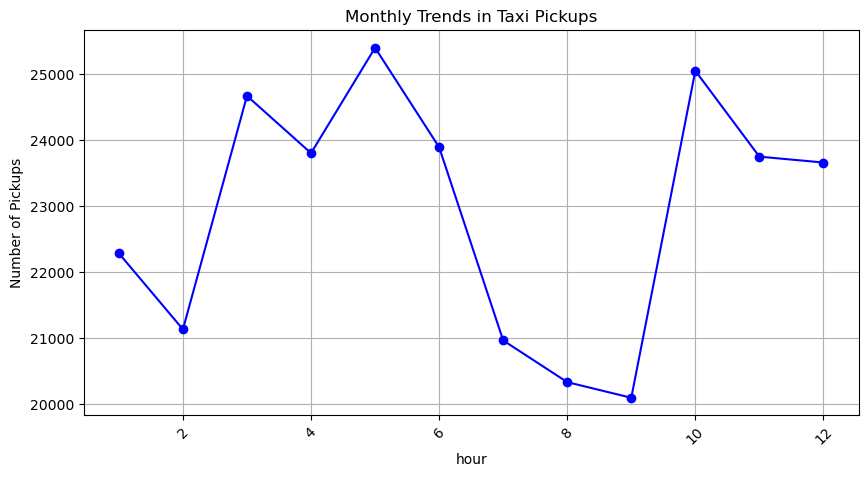

In [2095]:
# Show the monthly trends in pickups
df['month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month
monthly_pickups = df.groupby('month')['tpep_pickup_datetime'].count()
monthly_pickups.plot(kind='line', marker='o', figsize=(10, 5), color='blue', linestyle='-')
plt.xlabel('hour')
plt.ylabel('Number of Pickups')
plt.title('Monthly Trends in Taxi Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [2097]:
# Analyse the above parameters
zero_negative_values = (df[['fare_amount','tip_amount','total_amount','trip_distance']] <= 0).sum()
zero_negative_values

fare_amount         58
tip_amount       61528
total_amount        11
trip_distance     3361
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [2140]:
# Create a df with non zero entries for the selected parameters.
new_df = df[(df[['fare_amount','tip_amount','total_amount','trip_distance']] > 0).all(axis=1)]
new_df.shape

(212219, 22)

In [2142]:
new_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
2              2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
5              2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
6              2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
8              2  2023-12-01 00:01:25   2023-12-01 00:07:45              1.0   
...          ...                  ...                   ...              ...   
284484         1  2023-06-30 23:03:16   2023-06-30 23:17:31              2.0   
284485         2  2023-06-30 23:53:42   2023-07-01 00:15:29              2.0   
284487         1  2023-06-30 23:32:05   2023-06-30 23:45:24              1.0   
284488         1  2023-06-30 23:28:03   2023-07-01 00:10:39              1.0   
284489         2  2023-06-30 23:15:04   2023-06-30 23:24:59              1.0   

        trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
0                3.99        1.0                  N           148   
2                1.05        1.0                  N           161   
5                1.66        1.0                  N           114   
6                2.45        1.0                  N           164   
8                1.08        1.0                  N           114   
...               ...        ...                ...           ...   
284484           2.80        1.0                  N           142   
284485           3.59        1.0                  N           231   
284487           2.20        1.0                  N           232   
284488           6.50        1.0                  N           230   
284489           1.08        1.0                  N           114   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                 50             1  ...      0.5        5.66           0.0   
2                161             1  ...      0.5        3.14           0.0   
5                186             1  ...      0.5        3.14           0.0   
6                232             1  ...      0.5        1.00           0.0   
8                231             1  ...      0.5        2.00           0.0   
...              ...           ...  ...      ...         ...           ...   
284484           233             1  ...      0.5        5.30           0.0   
284485           256             1  ...      0.5        2.70           0.0   
284487           170             1  ...      0.5        4.95           0.0   
284488            97             1  ...      0.5        9.30           0.0   
284489            79             1  ...      0.5        3.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
0                         1.0         33.96                   2.5  2023-12-01   
2                         1.0         18.84                   2.5  2023-12-01   
5                         1.0         18.84                   2.5  2023-12-01   
6                         1.0         20.90                   2.5  2023-12-01   
8                         1.0         15.60                   2.5  2023-12-01   
...                       ...           ...                   ...         ...   
284484                    1.0         26.60                   2.5  2023-06-30   
284485                    1.0         31.00                   2.5  2023-06-30   
284487                    1.0         24.85                   2.5  2023-06-30   
284488                    1.0         55.80                   2.5  2023-06-30   
284489                    1.0         18.00                   2.5  2023-06-30   

        hour Airport_Fee  month  
0          0         0.0     12  
2          0         0.0     12  
5          0         0.0     12  
6          0         0.0     12  
8          0         0.0     12  
...      ...         ...    ...  
284484    23         0.0      6  
284485    23         0.0      6  
28

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

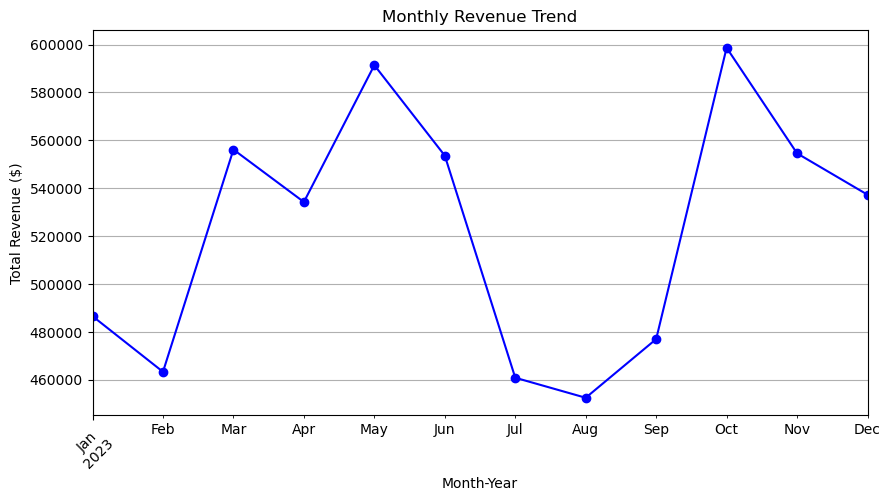

In [2144]:
# Group data by month and analyse monthly revenue
new_df['month_year'] = pd.to_datetime(new_df['tpep_pickup_datetime']).dt.to_period("M")
monthly_revenue = new_df.groupby('month_year')['total_amount'].sum()
plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue ($)')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [2146]:
# Calculate proportion of each quarter
new_df['quarter']=pd.to_datetime(new_df['tpep_pickup_datetime']).dt.quarter
quarterly_revenue = new_df.groupby('quarter')['total_amount'].sum()
## proportion of each quarter
quarterly_rev_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
quarterly_rev_proportion

quarter
1    24.034958
2    26.797935
3    22.189516
4    26.977591
Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

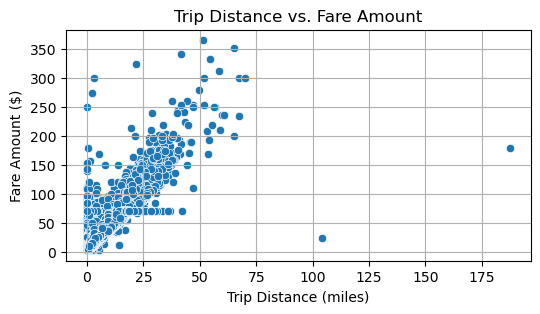

In [2148]:
# Show how trip fare is affected by distance

correlation_value = new_df['trip_distance'].corr(new_df['fare_amount'])
correlation_value.round(3)

plt.figure(figsize=(6,3))
sns.scatterplot(x=new_df['trip_distance'], y=new_df['fare_amount'])
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Distance vs. Fare Amount')
plt.grid(True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

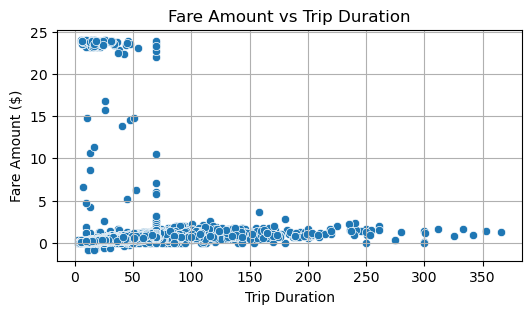

In [2160]:
# Show relationship between fare and trip duration
new_df["tpep_dropoff_datetime"] = pd.to_datetime(new_df["tpep_dropoff_datetime"])
new_df["tpep_pickup_datetime"] = pd.to_datetime(new_df["tpep_pickup_datetime"])
new_df["trip_duration"] = (new_df["tpep_dropoff_datetime"] - new_df["tpep_pickup_datetime"]).dt.total_seconds() / 3600

plt.figure(figsize=(6,3))
sns.scatterplot(x=new_df['fare_amount'], y=new_df['trip_duration'])
plt.xlabel("Trip Duration")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Trip Duration")
plt.grid(True)
plt.show()

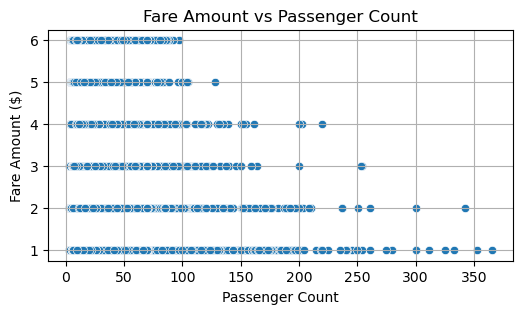

In [2162]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(6,3))
sns.scatterplot(x=new_df['fare_amount'], y=new_df['passenger_count'])
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Passenger Count")
plt.grid(True)
plt.show()

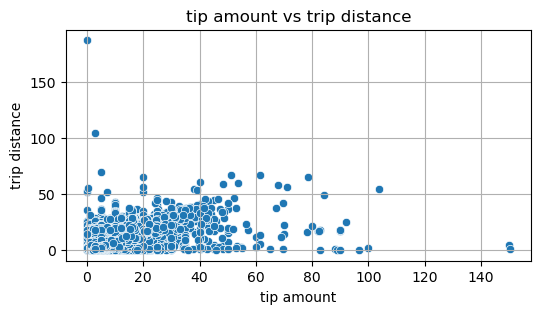

In [2164]:
# Show relationship between tip and trip distance
plt.figure(figsize=(6,3))
sns.scatterplot(x=new_df['tip_amount'], y=new_df['trip_distance'])
plt.xlabel("tip amount")
plt.ylabel("trip distance")
plt.title("tip amount vs trip distance")
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

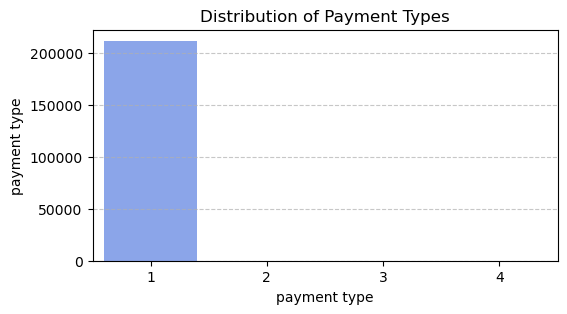

In [2166]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = new_df['payment_type'].value_counts()
payment_counts
plt.figure(figsize=(6, 3))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")
plt.xlabel("payment type")
plt.ylabel("payment type")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [810]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.4 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [2178]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

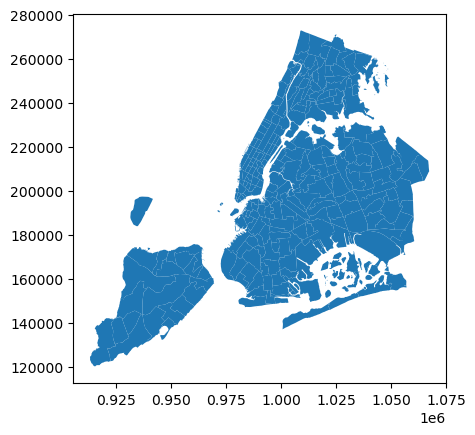

In [2180]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [2182]:
# Merge zones and trip records using locationID and PULocationID
merged_df = new_df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
2         2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
3         2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
4         2  2023-12-01 00:01:25   2023-12-01 00:07:45              1.0   

   trip_distance RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99        1.0                  N           148            50   
1           1.05        1.0                  N           161           161   
2           1.66        1.0                  N           114           186   
3           2.45        1.0                  N           164           232   
4           1.08        1.0                  N           114           231   

   payment_type  ...  month_year  quarter  trip_duration  OBJECTID  \
0             1  ...     2023-12        4       0.372500     148.0   
1             1  ...     2023-12        4       0.177222     161.0   
2             1  ...     2023-12        4       0.144722     114.0   
3             1  ...     2023-12        4       0.216944     164.0   
4             1  ...     2023-12        4       0.105556     114.0   

   Shape_Leng  Shape_Area                     zone  LocationID    borough  \
0    0.039131    0.000070          Lower East Side       148.0  Manhattan   
1    0.035804    0.000072           Midtown Center       161.0  Manhattan   
2    0.031727    0.000047  Greenwich Village South       114.0  Manhattan   
3    0.035772    0.000056            Midtown South       164.0  Manhattan   
4    0.031727    0.000047  Greenwich Village South       114.0  Manhattan   

                                            geometry  
0  POLYGON ((988552.836 201677.665, 988387.669 20...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((986306.712 203122.786, 986300.242 20...  
3  POLYGON ((988787.425 210315.593, 988662.868 21...  
4  POLYGON ((986306.712 203122.786, 986300.242 20...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [2188]:
# Group data by location and calculate the number of trips
total_trips = merged_df.groupby("LocationID")["LocationID"].count().reset_index(name="total_trips")
total_trips.head()

LocationID  total_trips
0         1.0            4
1         4.0          207
2         6.0            1
3         7.0           33
4         9.0            1

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [2202]:
# Merge trip counts back to the zones GeoDataFrame

zones_gdf = zones.merge(total_trips, left_on="LocationID", right_on="LocationID", how="left")
zones_gdf["total_trips"].fillna(zones_gdf["total_trips"].median(), inplace=True)
zones_gdf.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   total_trips  
0          4.0  
1         25.0  
2         25.0  
3        207.0  
4         25.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

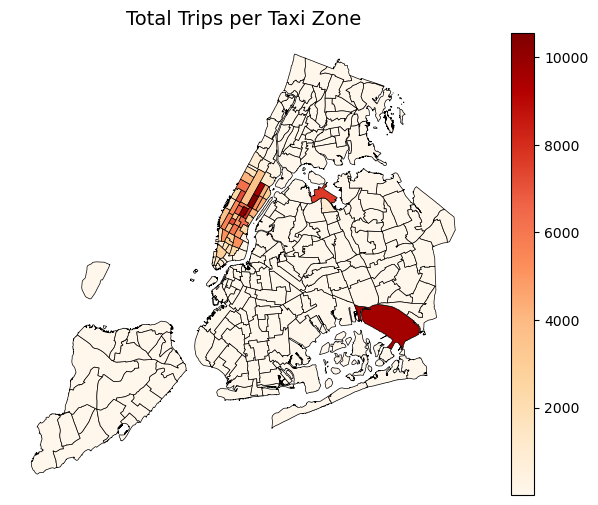

In [2215]:
# Define figure and axis
# figure:- It acts as an overall container of a plot which is mainly used to increase or
# decrease the size of the plot.
# axis:- It is the actual plot area embedded inside the figure. It includes x-axis,y-axis, labels.
# Plot the map and display it
fig, ax = plt.subplots(figsize=(9, 6))
zones_gdf.plot(column="total_trips", cmap="OrRd", linewidth=0.5, 
               edgecolor="black", legend=True, ax=ax)
plt.title("Total Trips per Taxi Zone", fontsize=14)
plt.axis("off")  # Hide axis labels
plt.show()

In [2211]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones_gdf = zones_gdf.sort_values(by="total_trips", ascending=True)
sorted_zones_gdf

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
119       120    0.083261    0.000093        Highbridge Park         120   
46         47    0.089828    0.000163     Claremont/Bathgate          47   
45         46    0.134475    0.000926            City Island          46   
63         64    0.184452    0.001058             Douglaston          64   
82         83    0.105985    0.000217       Elmhurst/Maspeth          83   
..        ...         ...         ...                    ...         ...   
161       162    0.035270    0.000048           Midtown East         162   
235       236    0.044252    0.000103  Upper East Side North         236   
131       132    0.245479    0.002038            JFK Airport         132   
160       161    0.035804    0.000072         Midtown Center         161   
236       237    0.042213    0.000096  Upper East Side South         237   

       borough                                           geometry  total_trips  
119  Manhattan  POLYGON ((1005562.335 252189.432, 1005597.841 ...          1.0  
46       Bronx  POLYGON ((1014430.835 250474.121, 1014081.534 ...          1.0  
45       Bronx  MULTIPOLYGON (((1043853.395 252845.891, 104386...          1.0  
63      Queens  POLYGON ((1055115.955 223059.396, 1055834.3 22...          1.0  
82      Queens  POLYGON ((1014422.557 210792.836, 1014532.616 ...          1.0  
..         ...                                                ...          ...  
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...       8041.0  
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...       9543.0  
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...       9638.0  
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...      10088.0  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...      10559.0  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [2451]:
# Find routes which have the slowest speeds at different times of the day
new_df["tpep_dropoff_datetime"] = pd.to_datetime(new_df["tpep_dropoff_datetime"])
new_df["tpep_pickup_datetime"] = pd.to_datetime(new_df["tpep_pickup_datetime"])

new_df["trip_duration"] = (new_df["tpep_dropoff_datetime"] - new_df["tpep_pickup_datetime"]).dt.total_seconds() / 3600
new_df["Speed"]=(new_df["trip_distance"].sum())/((new_df["trip_duration"]).mean())
new_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
5         2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
6         2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
8         2  2023-12-01 00:01:25   2023-12-01 00:07:45              1.0   

   trip_distance RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99        1.0                  N           148            50   
2           1.05        1.0                  N           161           161   
5           1.66        1.0                  N           114           186   
6           2.45        1.0                  N           164           232   
8           1.08        1.0                  N           114           231   

   payment_type  ...  total_amount  congestion_surcharge        date  hour  \
0             1  ...         33.96                   2.5  2023-12-01     0   
2             1  ...         18.84                   2.5  2023-12-01     0   
5             1  ...         18.84                   2.5  2023-12-01     0   
6             1  ...         20.90                   2.5  2023-12-01     0   
8             1  ...         15.60                   2.5  2023-12-01     0   

   Airport_Fee  month  month_year  quarter trip_duration         Speed  
0          0.0     12     2023-12        4      0.372500  2.590057e+06  
2          0.0     12     2023-12        4      0.177222  2.590057e+06  
5          0.0     12     2023-12        4      0.144722  2.590057e+06  
6          0.0     12     2023-12        4      0.216944  2.590057e+06  
8          0.0     12     2023-12        4      0.105556  2.590057e+06  

[5 rows x 26 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

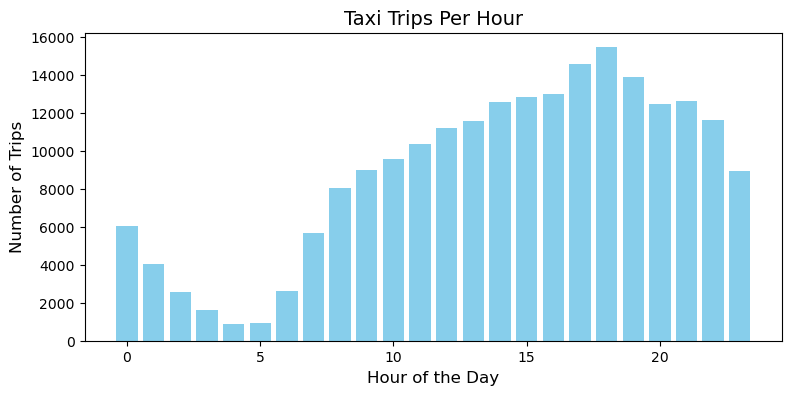

In [2225]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = merged_df["hour"].value_counts().sort_index()
plt.figure(figsize= (9,4))
plt.bar(hourly_trips.index, hourly_trips.values, color="skyblue")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.title("Taxi Trips Per Hour", fontsize=14)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [2456]:
merged_df.to_csv('mdf.csv')

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [2248]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
#sample_fraction =
busiest_hours = hourly_trips.nlargest(5)
sample_size = 0.1
busiest_hours["scaled_count"] = (busiest_hours.values / sample_size).astype(int)
busiest_hours

hour
18                                                 15456
17                                                 14591
19                                                 13875
16                                                 12976
15                                                 12867
scaled_count    [154560, 145910, 138750, 129760, 128670]
Name: count, dtype: object

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

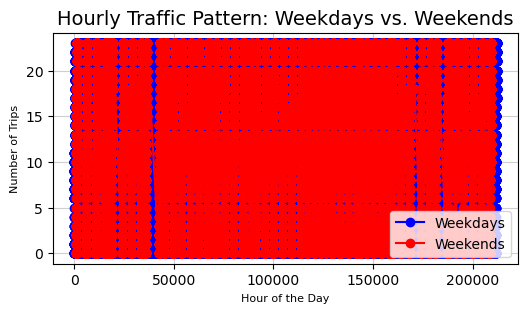

In [2459]:
# Compare traffic trends for the week days and weekends
merged_df["day_of_week"]=merged_df["tpep_pickup_datetime"].dt.dayofweek
weekdays_df = merged_df[merged_df["day_of_week"]<5]
weekends_df = merged_df[merged_df["day_of_week"]>=5]

plt.figure(figsize=(6,3))
plt.plot(weekdays_df.index, weekdays_df.hour.values, label="Weekdays", color="blue", marker="o")
plt.plot(weekends_df.index, weekends_df.hour.values, label="Weekends", color="red", marker="o")
plt.xlabel("Hour of the Day", fontsize=8)
plt.ylabel("Number of Trips", fontsize=8)
plt.title("Hourly Traffic Pattern: Weekdays vs. Weekends", fontsize=14)
plt.legend()
plt.grid(True, linestyle="-", alpha=0.6)
plt.show()

### What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

### **3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [2278]:
# Find top 10 pickup and dropoff zones
# Top pickup & Dropoff location
top_pickup_location = merged_df.groupby(["PULocationID"])["hour"].sum().nlargest(10)
top_dropoff_location = merged_df.groupby(["DOLocationID"])["hour"].sum().nlargest(10)
print(top_pickup_location)
print(top_dropoff_location)

PULocationID
161    157448
237    155560
132    144086
236    133208
162    120400
138    116758
142    111981
186     99444
230     99420
170     95455
Name: hour, dtype: int64
DOLocationID
236    149763
237    133824
161    108933
239     97885
142     93106
170     92807
141     89915
162     83694
230     81542
238     79448
Name: hour, dtype: int64


In [2294]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'date', 'hour', 'Airport_Fee',
       'month', 'month_year', 'quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'day_of_week'],
      dtype='object')

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [2331]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = merged_df.groupby("PULocationID").size().reset_index(name="pickup_count")
dropoff_counts = merged_df.groupby("DOLocationID").size().reset_index(name="dropoff_count")

top_10_pickup_dropoff = pd.merge(pickup_counts,dropoff_counts, 
                                 left_on="PULocationID", right_on="DOLocationID", 
                                 how="outer").fillna(0)
top_10_pickup_dropoff["Ratio"] = (top_10_pickup_dropoff["pickup_count"] / top_10_pickup_dropoff["dropoff_count"]).replace(0.00000, np.nan)
top_10_pickup_dropoff["Ratio"].fillna(top_10_pickup_dropoff["Ratio"].median(), inplace=True)
top_10 = top_10_pickup_dropoff.nlargest(10, "Ratio")
bottom_10 = top_10_pickup_dropoff.nsmallest(10, "Ratio")
# # Merge counts into a single DataFrame
merge_top_bottom = pd.concat([top_10, bottom_10]).reset_index(drop=True)
merge_top_bottom

PULocationID  pickup_count  DOLocationID  dropoff_count      Ratio
0           70.0         975.0            70             69  14.130435
1          132.0        9638.0           132           1992   4.838353
2          138.0        7642.0           138           2657   2.876176
3          186.0        7181.0           186           4542   1.581022
4          215.0          23.0           215             15   1.533333
5           43.0        3657.0            43           2620   1.395802
6          249.0        5190.0           249           3770   1.376658
7          114.0        2941.0           114           2179   1.349702
8          162.0        8041.0           162           6180   1.301133
9          100.0        3180.0           100           2613   1.216992
10         225.0           1.0           225            151   0.006623
11           1.0           4.0             1            571   0.007005
12         243.0           3.0           243            332   0.009036
13          92.0           1.0            92             81   0.012346
14          61.0           4.0            61            292   0.013699
15         220.0           1.0           220             72   0.013889
16          37.0           3.0            37            192   0.015625
17         202.0           2.0           202            115   0.017391
18         189.0           4.0           189            195   0.020513
19          89.0           3.0            89            140   0.021429

In [2297]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = merged_df.groupby("PULocationID").size().reset_index(name="trip_count")


Index(['PULocationID', 'trip_count'], dtype='object')

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1393]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_shift = merged_df[(merged_df["hour"] >= 23) | (merged_df["hour"] <= 5)]
night_shift.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'date', 'hour', 'Airport_Fee',
       'month', 'month_year', 'quarter', 'trip_duration', 'Speed',
       'day_of_week', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'distance_tier', 'tip_percentage',
       'avg_passenger_count'],
      dtype='object')

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [2338]:
# Filter for night hours (11 PM to 5 AM)
top_night_pickups = night_shift.groupby('zone')["PULocationID"].value_counts().reset_index()
top_night_pickups.columns = ["zone","PULocationID", "trip_count"]
top_night_dropoffs = night_shift.groupby('zone')["DOLocationID"].value_counts().reset_index()
top_night_dropoffs.columns = ["zone","DOLocationID", "trip_count"]
print(top_night_pickups)
print(top_night_dropoffs)

                          zone  PULocationID  trip_count
0                Alphabet City             4         126
1      Arrochar/Fort Wadsworth             6           1
2                      Astoria             7           7
3                 Baisley Park            10           4
4                 Battery Park            12           2
..                         ...           ...         ...
112  Williamsburg (South Side)           256          22
113                   Woodside           260           4
114         World Trade Center           261          58
115             Yorkville East           262          67
116             Yorkville West           263         402

[117 rows x 3 columns]
                zone  DOLocationID  trip_count
0      Alphabet City            79          16
1      Alphabet City           137          10
2      Alphabet City           107           8
3      Alphabet City           249           7
4      Alphabet City           229           5
...       

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [2344]:
# Analyse the fare per mile per passenger for different passenger counts
merged_df["fare_per_mile"] = merged_df["fare_amount"] / df["trip_distance"].replace(0, float("nan"))
merged_df["fare_per_mile_per_passenger"] = merged_df["fare_per_mile"] / df["passenger_count"].replace(0, float("nan"))
Avg_fare_per_mile_per_passenger = merged_df.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()
Avg_fare_per_mile_per_passenger

passenger_count  fare_per_mile_per_passenger
0              1.0                    13.271785
1              2.0                    15.110935
2              3.0                    15.181745
3              4.0                    15.180668
4              5.0                    12.311202
5              6.0                    13.818242

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [2352]:
# Compare the average fare per mile for different days and for different times of the day

avg_fare_per_mile_by_hour = merged_df.groupby("hour")["fare_per_mile"].mean().reset_index()
avg_fare_per_mile_by_day = merged_df.groupby("day_of_week")["fare_per_mile"].mean().reset_index()
print(avg_fare_per_mile_by_hour.head(6))
print(avg_fare_per_mile_by_day.head(6))

   hour  fare_per_mile
0     0      15.428502
1     1      15.948207
2     2      13.122877
3     3      15.965028
4     4      16.474182
5     5      22.164122
   day_of_week  fare_per_mile
0            0      16.667837
1            1      15.476494
2            2      15.793580
3            3      15.589234
4            4      15.984085
5            5      14.543570


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [2354]:
# Compare fare per mile for different vendors
avg_fare_by_vendor_hour = merged_df.groupby(["VendorID", "hour"])["fare_per_mile"].mean().reset_index()
avg_fare_by_vendor_hour.head(10)

VendorID  hour  fare_per_mile
0         1     0      12.763823
1         1     1      14.383756
2         1     2      11.010012
3         1     3      20.601664
4         1     4      14.540598
5         1     5      21.032853
6         1     6      14.141296
7         1     7      18.232118
8         1     8      12.957502
9         1     9      12.284518

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [2356]:
# Defining distance tiers
merged_df["distance_tier"] = pd.cut(
    merged_df["trip_distance"],
    bins=[0, 2, 5, float("inf")],  # 0-2, 2-5, >5
    labels=["Short (≤2 miles)", "Medium (2-5 miles)", "Long (>5 miles)"]
)
avg_fare_by_vendor_tier = merged_df.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index()
avg_fare_by_vendor_tier

VendorID       distance_tier  fare_per_mile
0         1    Short (≤2 miles)       8.361972
1         1  Medium (2-5 miles)      15.014738
2         1     Long (>5 miles)      39.428518
3         2    Short (≤2 miles)       8.432917
4         2  Medium (2-5 miles)      16.228352
5         2     Long (>5 miles)      40.182057

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [2404]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df["tip_percentage"] = (merged_df["tip_amount"] / merged_df["fare_amount"].replace(0, float("nan"))) * 100

# Average tip percentage by trip distance
avg_tip_by_distance = merged_df.groupby("distance_tier")["tip_percentage"].mean().reset_index()
print(avg_tip_by_distance)
# Average tip percentage by passenger count
avg_tip_by_passenger = merged_df.groupby("passenger_count")["tip_percentage"].mean().reset_index()
print(avg_tip_by_passenger)
# Average tip percentage by time of day
avg_tip_by_time = merged_df.groupby("hour")["tip_percentage"].mean().reset_index()
print(avg_tip_by_time)


        distance_tier  tip_percentage
0    Short (≤2 miles)       28.935923
1  Medium (2-5 miles)       23.135554
2     Long (>5 miles)       22.047473
   passenger_count  tip_percentage
0              1.0       26.250415
1              2.0       25.792049
2              3.0       25.855147
3              4.0       25.969242
4              5.0       26.119583
5              6.0       25.961571
    hour  tip_percentage
0      0       25.767576
1      1       26.736174
2      2       26.409679
3      3       27.559796
4      4       26.344930
5      5       25.613483
6      6       26.483438
7      7       25.071154
8      8       25.062549
9      9       25.200369
10    10       25.541734
11    11       25.370615
12    12       25.580501
13    13       25.452800
14    14       25.426957
15    15       24.863683
16    16       27.531370
17    17       27.361326
18    18       27.535941
19    19       27.547843
20    20       26.297467
21    21       26.223743
22    22       26.276968
23 

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [2438]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tips = merged_df[merged_df['tip_percentage']< 10]
high_tips = merged_df[merged_df['tip_percentage']> 25]
print(low_tips.head())
print(high_tips.head())

    VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3          2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
18         1  2023-12-01 00:24:28   2023-12-01 00:28:46              2.0   
19         2  2023-12-01 00:29:23   2023-12-01 00:36:02              1.0   
37         2  2023-12-01 02:34:53   2023-12-01 02:46:51              1.0   
83         2  2023-12-01 08:01:10   2023-12-01 08:11:37              1.0   

    trip_distance RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
3            2.45        1.0                  N           164           232   
18           0.50        1.0                  N           142           143   
19           1.02        1.0                  N           211           231   
37           2.88        1.0                  N           144           161   
83           1.13        1.0                  N           143           143   

    payment_type  ...                 zone  LocationID    borough  \

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [2400]:
# See how passenger count varies across hours and days
avg_passengers_by_hour = merged_df.groupby("hour")["passenger_count"].mean().reset_index()
avg_passengers_by_day = merged_df.groupby("day_of_week")["passenger_count"].mean().reset_index()
print(avg_passengers_by_day.head(5))
print(avg_passengers_by_hour.head(5))

   day_of_week  passenger_count
0            0         1.341230
1            1         1.312512
2            2         1.315132
3            3         1.328194
4            4         1.392451
   hour  passenger_count
0     0         1.406013
1     1         1.454297
2     2         1.428795
3     3         1.433915
4     4         1.361820


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [1346]:
# How does passenger count vary across zones

In [2372]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
merged_df["avg_passenger_count"] = merged_df.groupby("zone")["passenger_count"].transform("mean")
merged_df[['avg_passenger_count','zone']]

avg_passenger_count                       zone
0                  1.456939            Lower East Side
1                  1.368358             Midtown Center
2                  1.431486    Greenwich Village South
3                  1.402170              Midtown South
4                  1.431486    Greenwich Village South
...                     ...                        ...
212218             1.371204        Lincoln Square East
212219             1.347797       TriBeCa/Civic Center
212220             1.510204    Two Bridges/Seward Park
212221             1.434672  Times Sq/Theatre District
212222             1.431486    Greenwich Village South

[212223 rows x 2 columns]

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [2468]:
# How often is each surcharge applied?
## Pickup Zone
extra_by_pickup_zone = merged_df["PULocationID"].value_counts().reset_index()
extra_by_pickup_zone.columns = ["PULocationID", "extra_charge_count"]
## Dropoff Zone
extra_by_dropoff_zone = merged_df["DOLocationID"].value_counts().reset_index()
extra_by_dropoff_zone.columns = ["DOLocationID", "extra_charge_count"]
print(extra_by_dropoff_zone.head())
print(extra_by_pickup_zone.head())

   DOLocationID  extra_charge_count
0           236               10191
1           237                9283
2           161                8364
3           170                6517
4           239                6412
   PULocationID  extra_charge_count
0           237               10559
1           161               10088
2           132                9638
3           236                9543
4           162                8041


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Key Findings:

* Tipping Amount analysis with reference to Fare Amount:
  1. High fares receives higher tip percentages, which concludes that customers are tipping more when they are taking expensive rides.
  2. Low fares are more likely inclined towards lower tips, possibly due to passengers having minor expenses.

* Trip Distance & Tip Correlation:
  1. Longer trips correlate with higher tip percentages, suggesting that passengers feel a greater obligation to tip for extended services.
  2. Short-distance trips (<2 miles) frequently result in lower tip percentages, likely due to quick, utilitarian travel.

* Time of Day Impact:
  1. Highest tips occur during evening hours (6 PM - 10 PM), aligning with leisure travel, dining, and entertainment venues.
  2. Morning rush hours (6 AM - 9 AM) shows increase in trips from lower to higher.
  3. Late-night (12 AM - 5 AM) shows high trips to low trips, potentially reflecting nightlife-goers versus cost-conscious riders.

* Weekdays and Weekend Trends:
  1. Friday and Saturday rides see the highest average tips, likely due to social and leisure activities.
  2. Weekday rides (especially Monday-Wednesday) show lower tipping behavior, consistent with work-related travel.

* Passenger Count Impact:
  1. Larger groups (3+ passengers) tend to tip more, possibly due to shared responsibility or social pressure.
  2. Solo travelers tip less frequently, particularly on short trips.

* Low vs. High Tip Comparison:
  1. Low-tip trips (<10%) are common in short rides, low fares, and morning rush hours.
  2. High-tip trips (>25%) occur mostly in longer rides, high fares, and during weekends and evening hours.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Strategic Recommendations:

1. Optimize Routing & Dispatching Based on Demand Patterns-
   * Increase driver availability in high-tip areas during peak hours (6 PM - 10 PM, weekends).
   * Reduce supply during low-tip periods (morning rush) unless demand is high.
   * Prioritize long-distance ride requests over short ones for higher earnings potential.

2. Improve Customer Experience to Encourage Higher Tips-
   * Display tipping suggestions in the app to encourage fair gratuity.
   * Enhance service experience with cleaner cars, entertainment, or ride customizations during high-tip periods.

3. Location-Specific Deployment Strategy-
   * Deploy more drivers near restaurants, bars, and entertainment districts during peak evening hours.
   * Reduce supply in low-tip zones unless demand compensates for it.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Demand-Based Pricing & Incentives-
   * Introduce surge pricing for high-demand, high-tip hours (Friday & Saturday nights).
   * Offer incentives for drivers working in low-tip periods (weekday mornings) to maintain availability.
* By aligning supply with high-demand periods, optimizing dispatch algorithms, and implementing intelligent pricing strategies, the taxi service can maximize revenue while improving driver earnings and customer satisfaction.
* A data-driven approach to operations will ensure better efficiency, higher profitability, and an enhanced customer experience.